## Resampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df=pd.read_csv('./data/apple_stock.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


In [7]:
df['Date']=df['Date'].apply(pd.to_datetime)

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [12]:
df['month']=df.index.month

In [14]:
df.groupby('month').agg(sum)

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [15]:
df.groupby(df.index.year).agg(sum)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [16]:
df.groupby([df.index.year, 'month']).agg(sum)

High          Low         Open        Close        Volume  \
Date month                                                                     
2009 12       30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1       573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2       544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3       738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4       759.410004   744.359997   753.004292   753.445721  3.091782e+09   
...                 ...          ...          ...          ...           ...   
2018 8      4934.909988  4860.029999  4883.340012  4906.960037  7.002737e+08   
     9      4266.080002  4181.480011  4224.290009  4219.400024  6.789720e+08   
     10     5150.640030  5011.109985  5087.600021  5079.449997  7.897485e+08   
     11     4072.939987  3962.709976  4028.209991  4015.949997  9.613264e+08   
     12     3179.080017  3075.930023  3139.619995  3121.060028  8.989225e+08   

              Adj Close  
Date month               
2009 12       20.159719  
2010 1       377.554930  
     2       361.342400  
     3       491.575537  
     4       504.554579  
...                 ...  
2018 8      4884.851288  
     9      4204.729004  
     10     5061.788559  
     11     4012.316437  
     12     3121.060028  

[109 rows x 6 columns]

### We should know 'Offset Aliases'.

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [19]:
df.resample(rule='A').sum()['2009']

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719,12


In [20]:
def first_day(sample):
    return sample[0]

In [21]:
df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


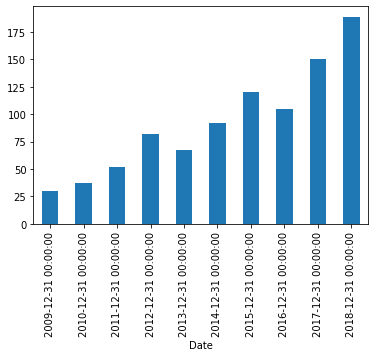

In [22]:
df['Close'].resample('A').mean().plot(kind='bar')

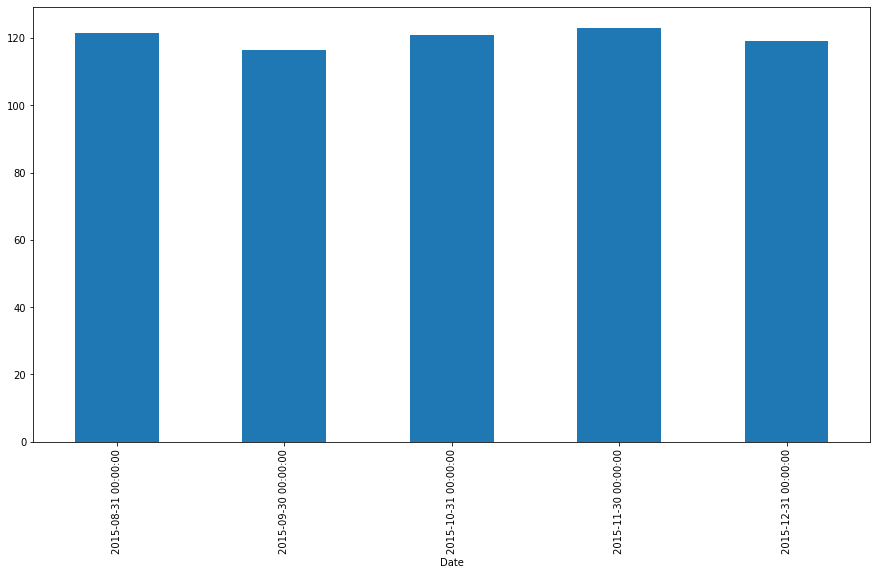

In [26]:
df['Open']['2015-8':'2015-12'].resample('M').max().plot(kind='bar', figsize=(15,8))

In [28]:
daily_daterange = \
pd.date_range(start=datetime(2018,9,1), end=datetime(2020,9,1), freq='B') # Business day만 추가

In [29]:
daily_dataset=\
pd.DataFrame(data={'value':np.random.rand(len(daily_daterange))},
            index=daily_daterange)

In [30]:
daily_dataset.head(10)

,value
2018-09-03,0.462112
2018-09-04,0.347919
2018-09-05,0.387228
2018-09-06,0.497046
2018-09-07,0.317132
2018-09-10,0.222085
2018-09-11,0.642003
2018-09-12,0.118798
2018-09-13,0.885941
2018-09-14,0.770792


In [31]:
daily_dataset.resample('W-MON').min()

,value
2018-09-03,0.462112
2018-09-10,0.222085
2018-09-17,0.118798
2018-09-24,0.315969
2018-10-01,0.087648
...,...
2020-08-10,0.061309
2020-08-17,0.068072
2020-08-24,0.429209
2020-08-31,0.190280


In [32]:
daily_dataset.resample('M').min()

,value
2018-09-30,0.118798
2018-10-31,0.032584
2018-11-30,0.030860
2018-12-31,0.201618
2019-01-31,0.022402
2019-02-28,0.127578
2019-03-31,0.094550
2019-04-30,0.060286
2019-05-31,0.089632
2019-06-30,0.071340
